<a href="https://colab.research.google.com/github/ravellys/Bootcamp-IGTI/blob/main/DevPython_Desafio_M%C3%B3dulo_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Módulo 2 - IGTI
---
## Análise de Dados com Python
## Bootcamp Desenvolvedor Python
## Lucas Ravellys

## **Justificativa**

---
<img src="https://image.freepik.com/vetores-gratis/kid-andar-de-bicicleta_23-2147513580.jpg?1" width="250" align="left"/> 

<div margin=12px padding=12px border=12px text-align='center'>
<p float="left" text-align='center'>
O uso de bicicletas como meio de transporte ganhou muita força nos últimos anos,
seja por questões ambientais, de saúde ou até mesmo de infraestrutura de trânsito. 
</p>
<p float="left" text-align='center'>
Para incentivar seu uso, cidades em todo o mundo têm implementado programas de
compartilhamento de bicicleta. Nesses sistemas, elas são retiradas e devolvidas em quiosques automatizados que ficam espalhados por diversos pontos da cidade.
</p>
<p float="left" text-align='center'>
As plataformas de compartilhamento de bicicletas costumam coletar diversos tipos
de dados, como a duração da viagem, as localizações iniciais e finais dos percursos, entre outros. Esses dados, em conjunto com informações sobre o clima, o trânsito e o relevo, por exemplo, possibilitam uma análise mais robusta do compartilhamento de bicicletas.
</p>
</div>


## **Objetivo** 
Analisar os dados de compartilhamento de bicicletas em
uma cidade, coletados pela Universidade do Porto

## Descritivo dos dados coletados:
- rec_id: índice do registro de locação;
- datetime : data;
- season : estação do ano (1: inverno, 2: primevera, 3: verão, 4: outono). Relativo ao
hemisfério norte;
- year : ano (0: 2011, 1:2012);
- month : mês (1 a 12);
- hour : hora do dia (0 a 23);
- is_holiday : booleano indicando feriado;
- weekday : dia da semana (0: domingo, 1: segunda-feira, …, 6: sábado);
- is_workingday : booleano indicando dia útil;
- weather_condition: (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte);
- temp : Temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39;
- atemp: Sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50;
- humidity: Humidade relativa (0 a 1);
- windspeed: Velocidade do vento escalada entre 0 e 1 (máximo original: 67);
- casual: número de locações para usuários casuais;
- registered: número de locações para usuários registrados;
- total_count: contador total de aluguéis (casual+registered)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")

In [ ]:
df.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Qual o tamanho desse dataset?

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = pd.DatetimeIndex(df['datetime']).year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   rec_id             17379 non-null  int64         
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

Qual a média da coluna windspeed?

In [ ]:
df['windspeed'].mean()

0.1900976063064631

Qual a média da coluna temp?

In [ ]:
df['temp'].mean()

0.4969871684216586

Quantos registros existem para o ano de 2011?

In [ ]:
(df['year'] == 2011).sum()

8645

Quantos registros existem para o ano de 2012?

In [ ]:
(df['year'] == 2012).sum()

8734

Quantas locações de bicicletas foram efetuadas em 2011?

In [ ]:
df[(df['year'] == 2011)].total_count.sum()

1243103

Quantas locações de bicicletas foram efetuadas em 2012?


In [ ]:
df[(df['year'] == 2012)].total_count.sum()

2049576

Qual estação do ano contém a maior média de locações de bicicletas?

Qual estação do ano contém a menor média de locações de bicicletas?

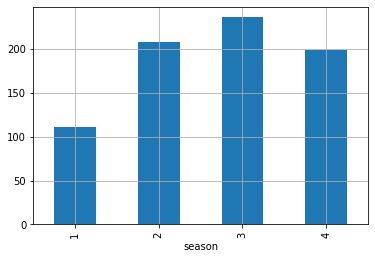

In [ ]:
df.groupby(by=['season']).mean()['total_count'].plot(kind='bar', grid=True)

Qual horário do dia contém a maior média de locações de bicicletas?

Qual horário do dia contém a menor média de locações de bicicletas?

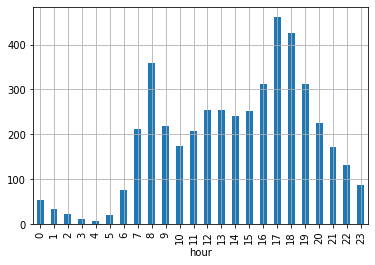

In [ ]:
df.groupby(by=['hour']).mean()['total_count'].plot(kind='bar', grid=True)

Que dia da semana contém a maior média de locações de bicicletas?

Que dia da semana contém a menor média de locações de bicicletas?

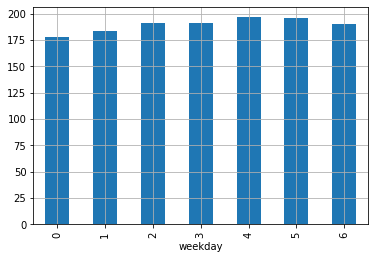

In [ ]:
df.groupby(by=['weekday']).mean()['total_count'].plot(kind='bar', grid=True)

Às quartas-feiras (weekday = 3), qual o horário do dia contém a maior média de
locações de bicicletas?

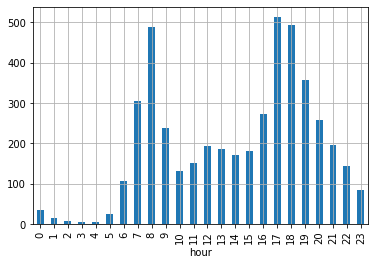

In [ ]:
df[(df['weekday'] == 3)].groupby(by=['hour']).mean()['total_count'].plot(kind='bar', grid=True)


Aos sábados (weekday = 6), qual o horário do dia contém a maior média de
locações de bicicletas?

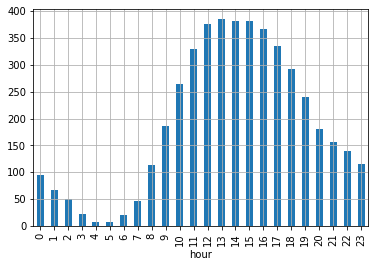

In [ ]:
df[(df['weekday'] == 6)].groupby(by=['hour']).mean()['total_count'].plot(kind='bar', grid=True)